# BigMart Sales Prediction

There are 2 datasets
1. train (8523) 
2. test (5681) 

The train data set has both independent and dependent (Item_Outlet_Sale) variable(s), but the test dataset does not have output variable. The aim is to predict the sales (Item_Outlet_Sale) for the test data.

* Item_Identifier: Unique product ID

* Item_Weight: Weight of product

* Item_Fat_Content: Whether the product is low fat or not

* Item_Visibility: The % of total display area of all products in a store allocated to the particular product

* Item_Type: The category to which the product belongs

* Item_MRP: Maximum Retail Price (list price) of the product

* Outlet_Identifier: Unique store ID

* Outlet_Establishment_Year: The year in which store was established

* Outlet_Size: The size of the store in terms of ground area covered

* Outlet_Location_Type: The type of city in which the store is located

* Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket

* Item_Outlet_Sales: Sales of the product in the particulat store. This is the outcome variable to be predicted.

In [402]:
import pandas as pd
import numpy as np

In [403]:
train = pd.read_csv('train_v9rqX0R.csv')
test = pd.read_csv('test_AbJTz2l.csv')

In [404]:
print(f"The train dataset contains - {len(train)} records")
print(f"The test dataset contains - {len(test)} records")

The train dataset contains - 8523 records
The test dataset contains - 5681 records


# Exploratory Data Analysis

In [405]:
train.shape, test.shape

((8523, 12), (5681, 11))

In [406]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [407]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [408]:
# need to predict Item_Outlet_Sales for given test data
# first merge the train and test data for Exploratory Data Analysis
train['source'] = 'train'
test['source'] = 'test'
test['Item_Outlet_Sales'] = 0
df = pd.concat([train, test], sort = False)
print(train.shape, test.shape, df.shape)

(8523, 13) (5681, 13) (14204, 13)


In [409]:
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [410]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'source'],
      dtype='object')

In [411]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage

In [412]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681,1308.865489
std,4.652502,0.051459,62.086938,8.371664,1699.791423
min,4.555000,0.000000,31.290000,1985.000000,0.000000
25%,8.710000,0.027036,94.012000,1987.000000,0.000000
50%,12.600000,0.054021,142.247000,1999.000000,559.272000
75%,16.750000,0.094037,185.855600,2004.000000,2163.184200
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [413]:
# check for categorical attributes
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'source']

In [414]:
categorial_features = df.select_dtypes(include ='object')
categorial_features.head(2)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,train
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,train


#### We have about 7 categorical columns excluding the source column

In [415]:
numerical_features = df.select_dtypes(include=[np.number])
numerical_features.head(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228


In [416]:
# check unique values in dataset
df.apply(lambda x: len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
dtype: int64

#### Attributes containing many unique values are of numerical type. The remaining attributes are of categorical type.

In [417]:
#check for missing values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

### Only Item_Weight and Outlet_Size have missing values.

### Item_Weight is a continuous variable. We can use either mean or median to impute the missing values, but here we will use mean.

### Outlet_Size is a categorical variable so will use mode to impute the missing values in the column

In [418]:
# fill the missing values
item_weight_mean = df.pivot_table(values = "Item_Weight", index = 'Item_Identifier')
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [419]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


### Data Cleaning and Imputing Missing Values

In [420]:
# two variables with missing values – Item_Weight and Outlet_Size. 
# Lets impute the former by the average weight of the particular item. This can be done as:
item_avg_weight = df.pivot_table(values='Item_Weight', index='Item_Identifier')

missing_values = df['Item_Weight'].isnull()
print('Missing values: %d' %sum(missing_values))

df.loc[missing_values,'Item_Weight']  = df.loc[missing_values,'Item_Identifier'].apply(lambda x: item_avg_weight.at[x,'Item_Weight'])
print('Missing values after immputation %d' %sum(df['Item_Weight'].isnull()))

Missing values: 2439
Missing values after immputation 0


In [421]:
# Lets impute Outlet_Size with the mode of the Outlet_Size for the particular type of outlet.
from scipy.stats import mode

#Determing the mode for each
outlet_size_mode = df.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:mode(x.astype('str')).mode[0]))
print ('Mode for each Outlet_Type:')
print (outlet_size_mode)

#Get a boolean variable specifying missing Item_Weight values
missing_values = df['Outlet_Size'].isnull() 

#Impute data and check #missing values before and after imputation to confirm
print ('\nOrignal #missing: %d'% sum(missing_values))
df.loc[missing_values,'Outlet_Size'] = df.loc[missing_values,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])
print ('\nMissing values after imputation: %d'% sum(df['Outlet_Size'].isnull()))

Mode for each Outlet_Type:
Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size           nan             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  

Orignal #missing: 4016

Missing values after imputation: 0


In [422]:
# check for Item_Visibility
sum(df['Item_Visibility']==0)

879

In [423]:
# replace zeros with mean
df.loc[:, 'Item_Visibility'].replace([0], [df['Item_Visibility'].mean()], inplace=True)

In [424]:
sum(df['Item_Visibility']==0)

0

In [425]:
# combine the repeated Values of the categorical column
# combine item fat content
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
df['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

# Creation of New Attributes

In [426]:
# create new attributes 'New_Item_Type' using existing attributes 'item_Identifier'
df['New_Item_Type'] = df['Item_Identifier'].apply(lambda x: x[:2])
df['New_Item_Type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
5676    FD
5677    FD
5678    NC
5679    FD
5680    FD
Name: New_Item_Type, Length: 14204, dtype: object

In [427]:
# fill in some meaningful value in it
df['New_Item_Type'] = df['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
df['New_Item_Type'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: New_Item_Type, dtype: int64

In [428]:
# use this 'Non_Consumable' category to represent the 'Fat_Content' which are 'Non-Edible'
df.loc[df['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
df['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [429]:
# create a new attribute to show small values for the establishment year
# create small values for establishment year
df['Outlet_Years'] = 2013 - df['Outlet_Establishment_Year']

In [430]:
df['Outlet_Years']

0       14
1        4
2       14
3       15
4       26
        ..
5676    16
5677     4
5678    11
5679     6
5680    11
Name: Outlet_Years, Length: 14204, dtype: int64

In [431]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,Food,14
3,FDX07,19.20,Regular,0.065953,Fruits and Vegetables,182.0950,OUT010,1998,nan,Tier 3,Grocery Store,732.3800,train,Food,15
4,NCD19,8.93,Non-Edible,0.065953,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,Non-Consumable,26


#### eliminate a few columns like 'Item_Identifier' and 'Outlet_Identifier'.

## Data Visualization

In [432]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

import warnings
warnings.filterwarnings('ignore')

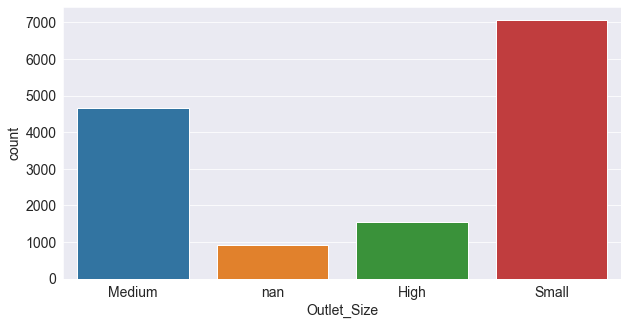

In [433]:
plt.figure(figsize=(10,5))
sns.countplot(df.Outlet_Size);

#### more than 5000 outlet are of medium size and around 900 outlset are of high size and 2400 outlet are of small size

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

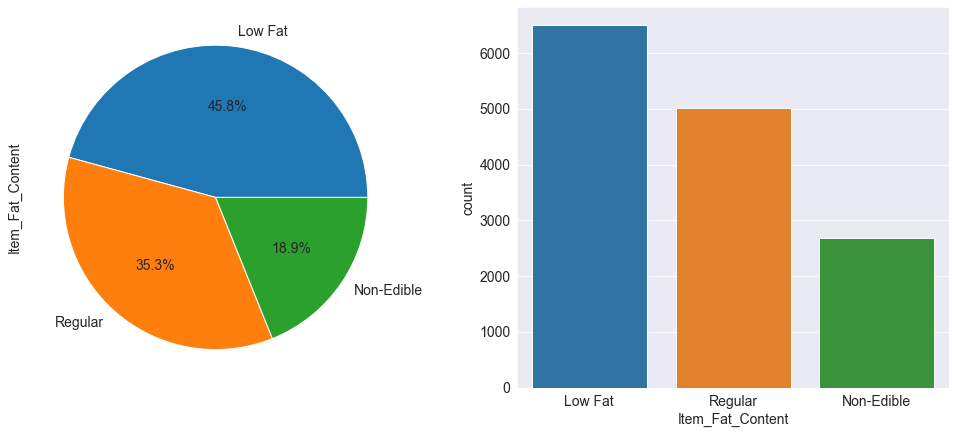

In [434]:
plt.figure(figsize=(17,7))
plt.subplot(1,2,1)
df['Item_Fat_Content'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['Item_Fat_Content'])
df['Item_Fat_Content'].value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64


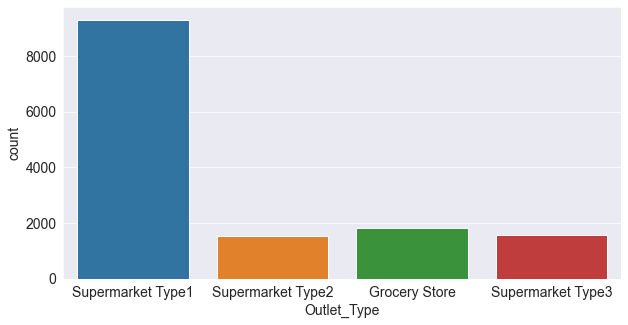

In [435]:
print(df.Outlet_Type.value_counts())
plt.figure(figsize=(10,5))

sns.countplot(df.Outlet_Type);

#### 5577 outlet are of supermarket type1 while no. of supermarket type 2 and supermarket type 3 are less than 1000

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

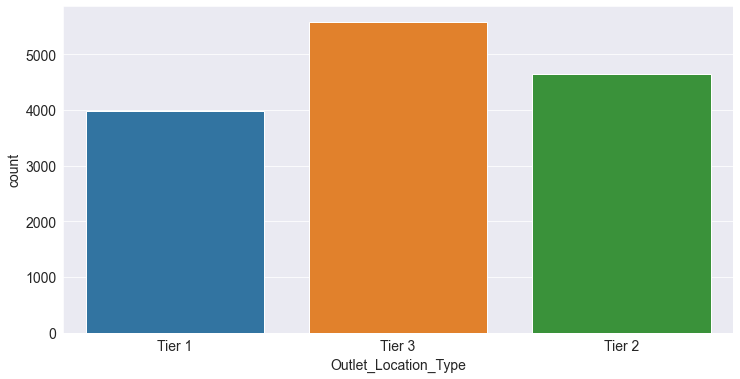

In [436]:
plt.figure(figsize=(12,6))
sns.countplot(df.Outlet_Location_Type)

#### nearly 3300 outlet are in tier 3 city while tier 1 and tier 2 city having 2300 and 2750 outlet respectively

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

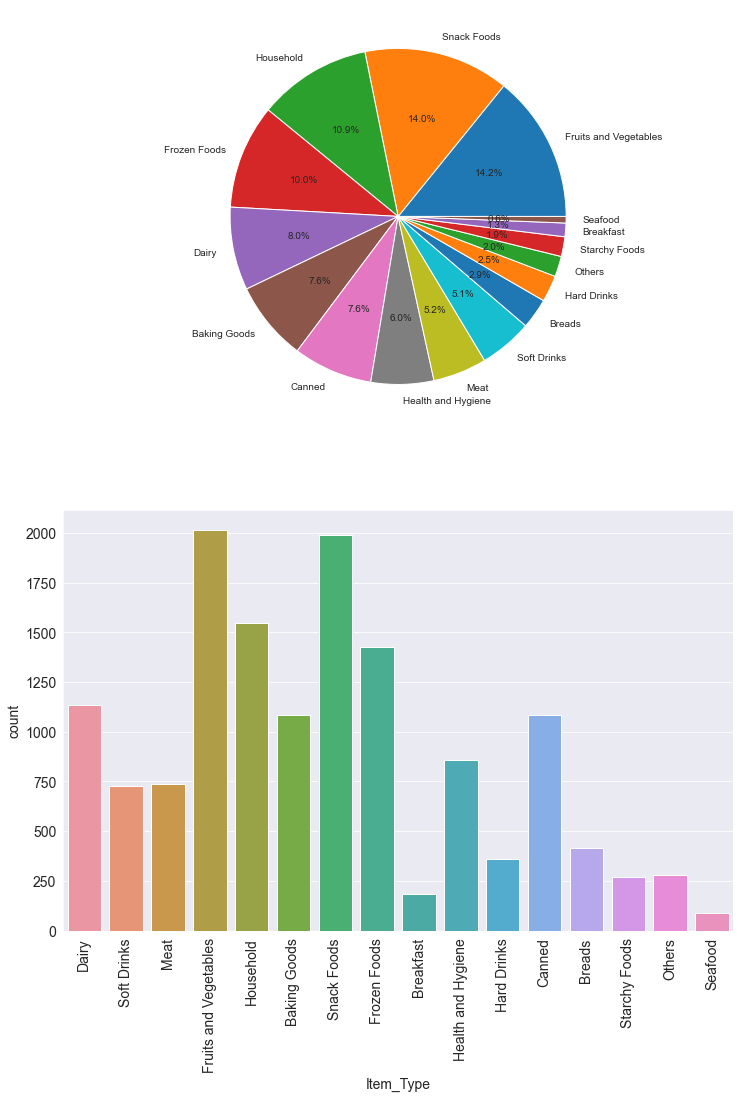

In [437]:
plt.figure(figsize=(12,17))
plt.subplot(2,1,1)
df['Item_Type'].value_counts().plot.pie(autopct='%1.1f%%',textprops={'fontsize':10})
plt.ylabel('')
plt.subplot(2,1,2)
sns.countplot(df['Item_Type'])
plt.xticks(rotation = 90)
df['Item_Type'].value_counts()

#### 14.5% item are of Fruits and Vegetables type and 14.1% food item are of Snack Foods type these two food having highest share amond all food type

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

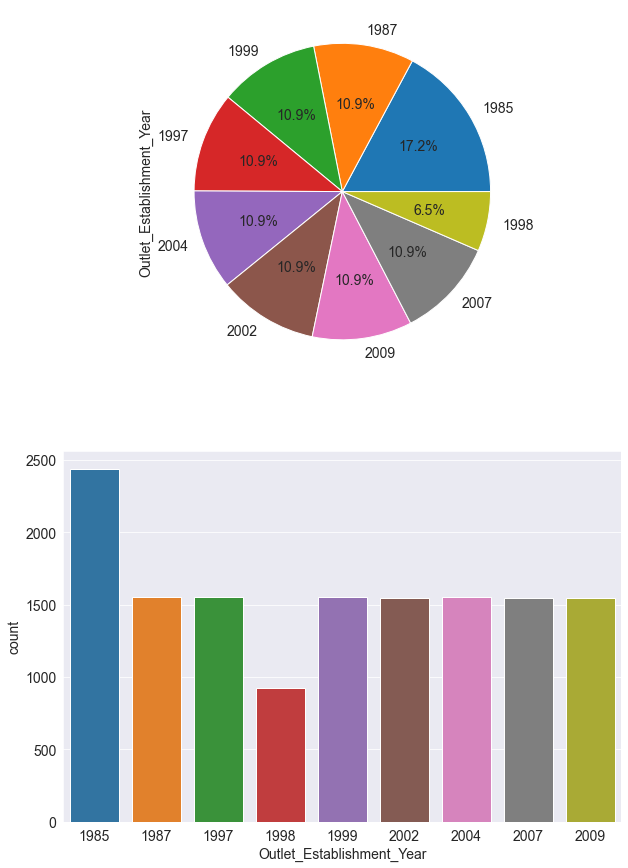

In [438]:
plt.figure(figsize=(10,15))
plt.subplot(2,1,1)
df['Outlet_Establishment_Year'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(2,1,2)
sns.countplot(df['Outlet_Establishment_Year'])
df['Outlet_Establishment_Year'].value_counts()

#### Most outlets were opened in 1985 and least in 1998

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

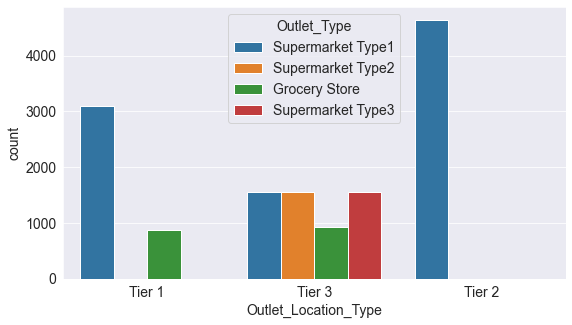

In [439]:
sns.countplot(df['Outlet_Location_Type'],hue=df['Outlet_Type'])

#### tier 3 city having all type of store supermarket type 1, supermarket type 2, super market 3 and grocery store while tier2 city having only supermarket type 1 store

Text(0.5, 1.0, 'Item_Outlet_Sales vs outlet_type')

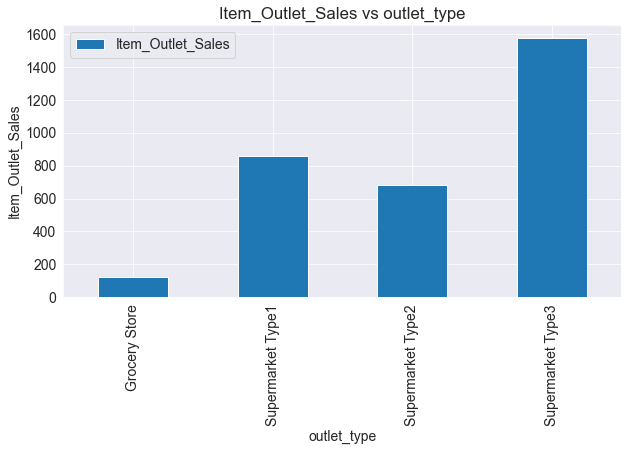

In [440]:
# outlset haiving highest sales
Outlet_Type_pivot=\
df.pivot_table(index='Outlet_Type',values='Item_Outlet_Sales',aggfunc=np.median)
Outlet_Type_pivot.plot(kind='bar',figsize=(10,5))
plt.xlabel('outlet_type')
plt.ylabel('Item_Outlet_Sales')
plt.title('Item_Outlet_Sales vs outlet_type')

Text(0.5, 1.0, 'item_fat_content vs item_outlet_sales')

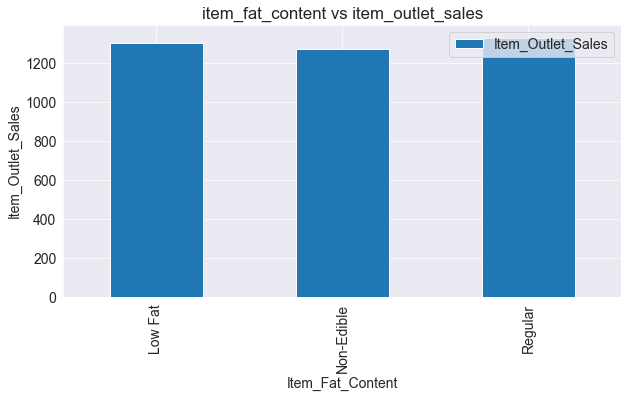

In [441]:
Item_Fat_Content_pivot= \
df.pivot_table(index='Item_Fat_Content', values='Item_Outlet_Sales', aggfunc=np.mean)
Item_Fat_Content_pivot.plot(kind='bar',figsize=(10,5))
plt.xlabel('Item_Fat_Content')
plt.ylabel('Item_Outlet_Sales')
plt.title('item_fat_content vs item_outlet_sales')

<AxesSubplot:>

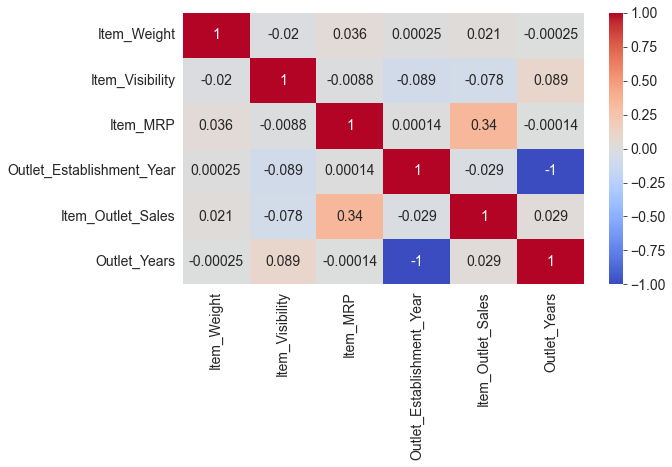

In [442]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [443]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'source', 'New_Item_Type',
       'Outlet_Years'],
      dtype='object')

# Label Encoding

In [444]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Outlet'] = le.fit_transform(df['Outlet_Identifier'])
cat_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type']
for col in cat_col:
    df[col] = le.fit_transform(df[col])

# One-Hot Encoding

In [445]:
df = pd.get_dummies(df, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'])
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,source,Outlet_Years,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,FDA15,9.30,0.016047,4,249.8092,OUT049,1999,3735.1380,train,14,...,1,0,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,14,48.2692,OUT018,2009,443.4228,train,4,...,0,0,1,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,10,141.6180,OUT049,1999,2097.2700,train,14,...,1,0,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.065953,6,182.0950,OUT010,1998,732.3800,train,15,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,8.93,0.065953,9,53.8614,OUT013,1987,994.7052,train,26,...,0,0,1,0,1,0,0,0,0,1


In [446]:
# Drop some of the columns
df.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)

## Splitting the data for Training and Testing

In [447]:
# Divide into test and train:
train = df.loc[df['source']=="train"]
test = df.loc[df['source']=="test"]

In [448]:
train

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Item_Outlet_Sales,source,Outlet_Years,Outlet,Item_Fat_Content_0,Item_Fat_Content_1,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,9.300,0.016047,4,249.8092,3735.1380,train,14,9,1,0,...,1,0,0,0,1,0,0,0,1,0
1,5.920,0.019278,14,48.2692,443.4228,train,4,3,0,0,...,0,0,1,0,0,1,0,1,0,0
2,17.500,0.016760,10,141.6180,2097.2700,train,14,9,1,0,...,1,0,0,0,1,0,0,0,1,0
3,19.200,0.065953,6,182.0950,732.3800,train,15,0,0,0,...,0,0,1,1,0,0,0,0,1,0
4,8.930,0.065953,9,53.8614,994.7052,train,26,1,0,1,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,13,214.5218,2778.3834,train,26,1,1,0,...,0,0,1,0,1,0,0,0,1,0
8519,8.380,0.046982,0,108.1570,549.2850,train,11,7,0,0,...,0,1,0,0,1,0,0,0,1,0
8520,10.600,0.035186,8,85.1224,1193.1136,train,9,6,0,1,...,0,1,0,0,1,0,0,0,0,1
8521,7.210,0.145221,13,103.1332,1845.5976,train,4,3,0,0,...,0,0,1,0,0,1,0,0,1,0


In [449]:
# Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'], axis=1, inplace=True)
train.drop(['source'], axis=1, inplace=True)

In [450]:
test.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Years,Outlet,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Size_0,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,20.750,0.007565,13,107.8622,14,9,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,8.300,0.038428,4,87.3198,6,2,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
2,14.600,0.099575,11,241.7538,15,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,1
3,7.315,0.015388,13,155.0340,6,2,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
4,13.600,0.118599,4,234.2300,28,5,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0


In [451]:
train.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Item_Outlet_Sales,Outlet_Years,Outlet,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,9.30,0.016047,4,249.8092,3735.1380,14,9,1,0,0,...,1,0,0,0,1,0,0,0,1,0
1,5.92,0.019278,14,48.2692,443.4228,4,3,0,0,1,...,0,0,1,0,0,1,0,1,0,0
2,17.50,0.016760,10,141.6180,2097.2700,14,9,1,0,0,...,1,0,0,0,1,0,0,0,1,0
3,19.20,0.065953,6,182.0950,732.3800,15,0,0,0,1,...,0,0,1,1,0,0,0,0,1,0
4,8.93,0.065953,9,53.8614,994.7052,26,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1


In [452]:
train.shape, test.shape

((8523, 24), (5681, 23))

In [455]:
X = train.drop('Item_Outlet_Sales', axis=1)

In [457]:
Y = train['Item_Outlet_Sales']

In [459]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=101, test_size=0.2)

# Model Building - Linear Regression

In [460]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [461]:
lr.fit(X_train, Y_train)

LinearRegression()

In [462]:
Y_pred = lr.predict(X_test)

In [463]:
r2_score(Y_test, Y_pred)

0.5578909832228671

In [474]:
print(r2_score(Y_test,Y_pred))
print(mean_absolute_error(Y_test,Y_pred))
print(np.sqrt(mean_squared_error(Y_test,Y_pred)))
print(mean_squared_error(Y_test, Y_pred))

0.5578909832228671
824.5949737247228
1097.6831625864882
1204908.3254258747


In [469]:
test_pred = lr.predict(test)

5681


In [470]:
submission = pd.read_csv("sample_submission_8RXa3c6.csv")
submission

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000
...,...,...,...
5676,FDB58,OUT046,1000
5677,FDD47,OUT018,1000
5678,NCO17,OUT045,1000
5679,FDJ26,OUT017,1000


In [471]:
submission['Item_Outlet_Sales'] = test_pred

In [472]:
submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1868.124612
1,FDW14,OUT017,1594.859717
2,NCN55,OUT010,1895.568595
3,FDQ58,OUT017,2619.186441
4,FDY38,OUT027,5197.118933


In [473]:
submission.to_csv("Balamurugan_M.csv", index= False)